In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
# Load train dataset
df = pd.read_csv('./input/train.csv')
# Load features dataset and join it with train data
features_df = pd.read_csv('./input/features.csv')
df = pd.merge(df, features_df.drop(['IsHoliday'], axis = 1), how = 'left', on = ['Store', 'Date'])
# Load store dataset and join with above data
stores_df = pd.read_csv('./input/stores.csv')
df = pd.merge(df, stores_df, how = 'left', on = ['Store'])
print(df.shape)
df.head(10)

(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
5,1,1,2010-03-12,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
8,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
9,1,1,2010-04-09,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [5]:
dat = df.loc[(df.Store == 1) & (df.Dept == 1),['Date','Weekly_Sales']]
print('Earliest date: %s; Latest date: %s' % (dat['Date'].min(), dat['Date'].max()))

Earliest date: 2010-02-05; Latest date: 2012-10-26


In [6]:
dat.head()

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [7]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          143 non-null    object 
 1   Weekly_Sales  143 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
dat.describe()

,Weekly_Sales
count,143.000000
mean,22513.322937
std,9854.349032
min,14537.370000
25%,16494.630000
50%,18535.480000
75%,23214.215000
max,57592.120000


In [9]:
dat.Date.describe()

count            143
unique           143
top       2010-02-05
freq               1
Name: Date, dtype: object

In [10]:
dat.set_index('Date', inplace=True)

In [11]:
dat.groupby('Date')

In [12]:
dat.index

Index(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02', '2010-04-09',
       ...
       '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14', '2012-09-21',
       '2012-09-28', '2012-10-05', '2012-10-12', '2012-10-19', '2012-10-26'],
      dtype='object', name='Date', length=143)

<Axes: title={'center': 'Walmart Sales in One Department of One Store Feb 2010 to Oct 2012'}, xlabel='Date'>

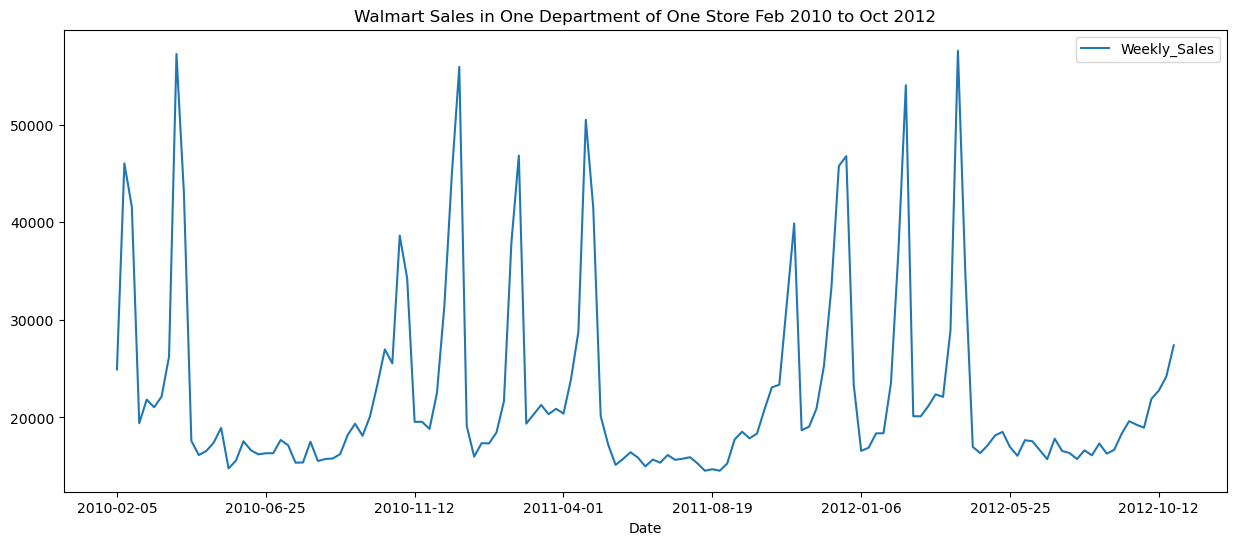

In [13]:
%matplotlib inline
# plot data
dat.plot(figsize=(15, 6),title="Walmart Sales in One Department of One Store Feb 2010 to Oct 2012")

In [14]:
dat.index = pd.to_datetime(dat.index)

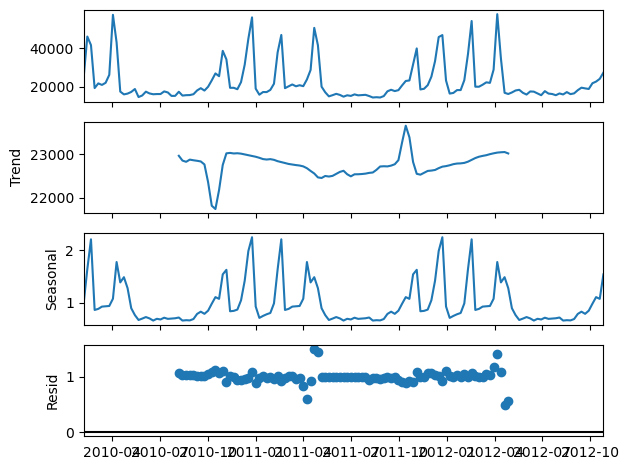

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dat, model='multiplicative')
fig = result.plot()


In [18]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(dat, start_p=1, d=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2840.830, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2804.538, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2785.696, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2840.080, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2787.351, Time=0.26 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2787.311, Time=0.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2804.768, Time=0.09 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.83 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.62 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total 

In [19]:
train = dat.loc[:'2012-05-01']
test = dat.loc['2012-05-01':]
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [20]:
future_forecast = stepwise_model.predict(n_periods=len(test))

<Axes: xlabel='Date'>

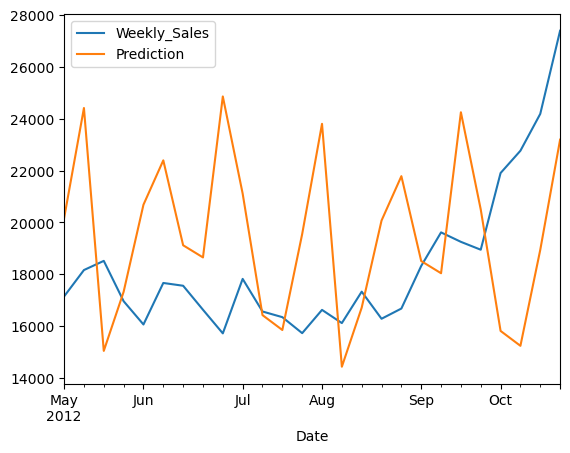

In [21]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

<Axes: title={'center': 'Walmart Sales in One Department of One Store Feb 2010 to Oct 2012'}, xlabel='Date'>

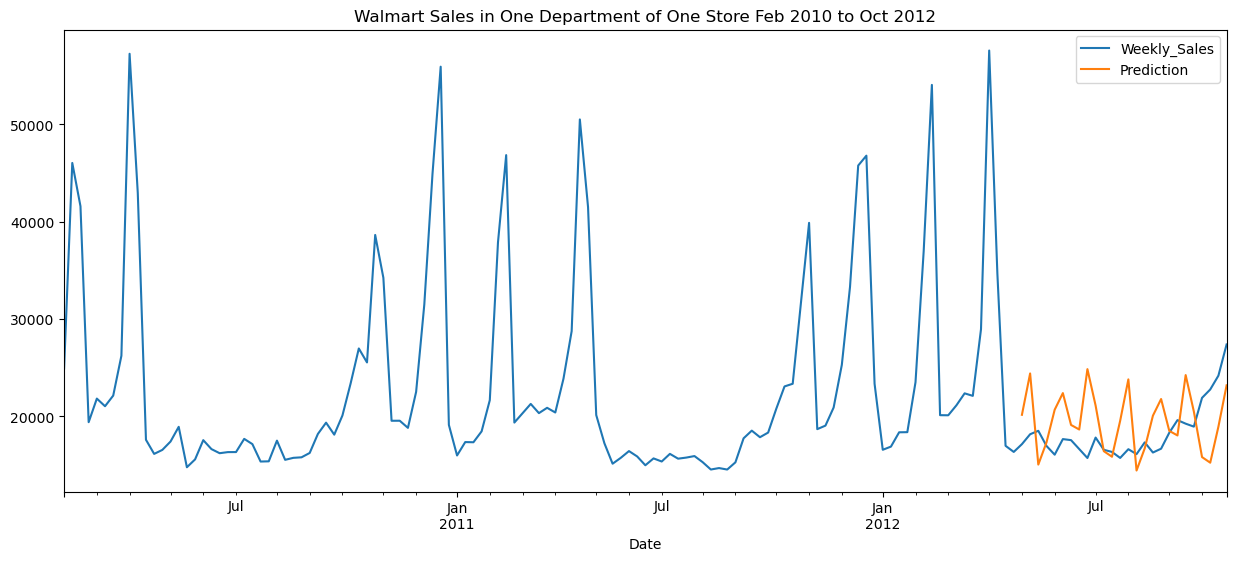

In [22]:
pd.concat([dat,future_forecast],axis=1).plot(figsize=(15, 6),
                                             title="Walmart Sales in One Department of One Store Feb 2010 to Oct 2012")

#### Calculating RMSE of ARIMA Model

In [23]:
from sklearn.metrics import mean_squared_error
# Compare the predicted values to the actual values using MSE
mse = mean_squared_error(test, future_forecast)
# Calculate the RMSE
rmse = np.sqrt(mse)

print('RMSE:', rmse)

RMSE: 4311.068704387429
